# making a dataset

In [4]:
import cv2
import numpy as np
import mediapipe as mp
import os
import time

# Initialize MediaPipe Hand Landmark Detection
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

dataset_path = 'C:\\Users\\jithi\\OneDrive\\Desktop\\VsCode\\soft computing'

key_folders = {
    ord('1'): 'fist_open',
    ord('2'): 'left',
    ord('3'): 'right',
    ord('4'): 'rotate2'
}

for folder_name in key_folders.values():
    folder_path = os.path.join(dataset_path, folder_name)
    os.makedirs(folder_path, exist_ok=True)

cap = cv2.VideoCapture(0)

capture_interval = 0.25  
last_capture_time = 0  

while True:
    ret, frame = cap.read()
    white_image = np.ones_like(frame) * 255
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.4) as hands:
        results = hands.process(frame_rgb)

        if results.multi_hand_landmarks:
            white_image = np.ones_like(frame) * 255
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    white_image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                    landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 0), thickness=2, circle_radius=2),
                    connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 0), thickness=2)
                )

                landmarks = hand_landmarks.landmark
                x_min = min(landmarks, key=lambda landmark: landmark.x).x
                x_max = max(landmarks, key=lambda landmark: landmark.x).x
                y_min = min(landmarks, key=lambda landmark: landmark.y).y
                y_max = max(landmarks, key=lambda landmark: landmark.y).y

                x_min = int(x_min * frame.shape[1])
                x_max = int(x_max * frame.shape[1])
                y_min = int(y_min * frame.shape[0])
                y_max = int(y_max * frame.shape[0])

                padding = 20
                x_min, x_max, y_min, y_max = x_min - padding, x_max + padding, y_min - padding, y_max + padding

                x_min = max(0, x_min)
                x_max = min(frame.shape[1], x_max)
                y_min = max(0, y_min)
                y_max = min(frame.shape[0], y_max)

                cv2.rectangle(white_image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

                current_time = time.time()
                if current_time - last_capture_time >= capture_interval:
                    key = cv2.waitKey(1) & 0xFF
                    if key in key_folders:
                        folder_name = key_folders[key]
                        folder_path = os.path.join(dataset_path, folder_name)
                        image_path = os.path.join(folder_path, f'image_{current_time}.jpg')
                        cropped_image = white_image[y_min:y_max, x_min:x_max]
                        resized_image = cv2.resize(cropped_image, (256, 256))
                        cv2.imwrite(image_path, resized_image)
                        last_capture_time = current_time

    cv2.imshow('Hand Landmarks', white_image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


# code to process folders

In [ ]:
# main_folder_path = 'C:\\Users\\jithi\\OneDrive\\Desktop\\VsCode\\soft datasets'  
def process_frame(frame):
    white_image = np.ones_like(frame) * 255
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5) as hands:
        results = hands.process(frame_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                landmarks = hand_landmarks.landmark

                x_min = min(landmarks, key=lambda landmark: landmark.x).x
                x_max = max(landmarks, key=lambda landmark: landmark.x).x
                y_min = min(landmarks, key=lambda landmark: landmark.y).y
                y_max = max(landmarks, key=lambda landmark: landmark.y).y
                x_min = int(x_min * frame.shape[1])
                x_max = int(x_max * frame.shape[1])
                y_min = int(y_min * frame.shape[0])
                y_max = int(y_max * frame.shape[0])

                padding = 20
                x_min -= padding
                x_max += padding
                y_min -= padding
                y_max += padding

                x_min = max(0, x_min)
                x_max = min(frame.shape[1], x_max)
                y_min = max(0, y_min)
                y_max = min(frame.shape[0], y_max)

                white_image = white_image[y_min:y_max, x_min:x_max]

                mp_drawing.draw_landmarks(
                    white_image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                    landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 0), thickness=2, circle_radius=2),
                    connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 0), thickness=2)
                )

    return white_image


for root, dirs, files in os.walk(main_folder_path):
    for subfolder in dirs:
        subfolder_path = os.path.join(root, subfolder)
        output_folder_path = os.path.join(subfolder_path + "_skeletal",)

        if not os.path.exists(output_folder_path):
            os.makedirs(output_folder_path)

        for file_name in os.listdir(subfolder_path):
            if file_name.endswith('.jpg'):
                image_path = os.path.join(subfolder_path, file_name)
                image = cv2.imread(image_path)
                processed_image = process_frame(image)
                output_image_path = os.path.join(output_folder_path, file_name)
                cv2.imwrite(output_image_path, processed_image)

cv2.destroyAllWindows()


# loading created dataset

In [4]:
import os
import cv2
import numpy as np

directory = 'C:\\Users\\jithi\\OneDrive\\Desktop\\VsCode\\soft computing'

for foldername in os.listdir(directory):
    folder_path = os.path.join(directory, foldername)
    if os.path.isdir(folder_path):
        image_arrays = []       
        for filename in os.listdir(folder_path):
            if filename.endswith('.jpg'):
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path)
                resized_image = cv2.resize(image, (256, 256))
                image_array = np.array(resized_image)
                image_arrays.append(image_array)
        
        image_arrays = np.array(image_arrays)
        np.save(f"{foldername}.npy", image_arrays)

In [79]:
import numpy as np

fist_open = np.load('numpy files\\fist_open.npy')
left=np.load('numpy files\\left.npy')
rotate=np.load('numpy files\\right.npy')
right=np.load('numpy files\\rotate.npy')

In [6]:
fist_open=fist_open/255
left=left/255
right=right/255
rotate=rotate/255

In [7]:
import pandas as pd
array_names = ['fist_open', 'left', 'right', 'rotate']
arrays = [fist_open, left, right, rotate]
df = pd.DataFrame(columns=['ArrayName', 'Image'])
for array_name, array in zip(array_names, arrays):
    for i, image in enumerate(array):
        new_row = {'ArrayName': array_name, 'Image': image}
        df = df.append(new_row, ignore_index=True)
print(df)

      ArrayName                                              Image
0     fist_open  [[[0.0, 0.9921568627450981, 0.0117647058823529...
1     fist_open  [[[0.0, 0.9921568627450981, 0.0039215686274509...
2     fist_open  [[[0.0, 1.0, 0.0], [0.0, 1.0, 0.01176470588235...
3     fist_open  [[[0.0, 1.0, 0.0], [0.011764705882352941, 1.0,...
4     fist_open  [[[0.0, 1.0, 0.0], [0.01568627450980392, 1.0, ...
...         ...                                                ...
2055     rotate  [[[0.0, 0.996078431372549, 0.0], [0.0156862745...
2056     rotate  [[[0.0, 1.0, 0.0], [0.00392156862745098, 0.988...
2057     rotate  [[[0.0, 1.0, 0.00392156862745098], [0.00784313...
2058     rotate  [[[0.0, 0.996078431372549, 0.0], [0.0117647058...
2059     rotate  [[[0.0, 1.0, 0.0], [0.0, 1.0, 0.01960784313725...

[2060 rows x 2 columns]


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['ArrayName'] = label_encoder.fit_transform(df['ArrayName'])
print(df)

      ArrayName                                              Image
0             0  [[[0.0, 0.9921568627450981, 0.0117647058823529...
1             0  [[[0.0, 0.9921568627450981, 0.0039215686274509...
2             0  [[[0.0, 1.0, 0.0], [0.0, 1.0, 0.01176470588235...
3             0  [[[0.0, 1.0, 0.0], [0.011764705882352941, 1.0,...
4             0  [[[0.0, 1.0, 0.0], [0.01568627450980392, 1.0, ...
...         ...                                                ...
2055          3  [[[0.0, 0.996078431372549, 0.0], [0.0156862745...
2056          3  [[[0.0, 1.0, 0.0], [0.00392156862745098, 0.988...
2057          3  [[[0.0, 1.0, 0.00392156862745098], [0.00784313...
2058          3  [[[0.0, 0.996078431372549, 0.0], [0.0117647058...
2059          3  [[[0.0, 1.0, 0.0], [0.0, 1.0, 0.01960784313725...

[2060 rows x 2 columns]


In [9]:
label_encoder_dict = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_encoder_dict)

{'fist_open': 0, 'left': 1, 'right': 2, 'rotate': 3}


In [10]:
from sklearn.model_selection import train_test_split

train_data, test_data = [], []

for target_class in df['ArrayName'].unique():
    target_data = df[df['ArrayName'] == target_class]
    train_target, test_target = train_test_split(target_data, test_size=0.2, random_state=42)
    train_data.append(train_target)
    test_data.append(test_target)

train_data = pd.concat(train_data)
test_data = pd.concat(test_data)

train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [122]:
train_data

,ArrayName,Image
0,0,"[[[0.0392156862745098, 0.9882352941176471, 0.0..."
1,3,"[[[0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0039215..."
2,1,"[[[0.0, 0.996078431372549, 0.0], [0.0156862745..."
3,3,"[[[0.0, 0.996078431372549, 0.00784313725490196..."
4,3,"[[[0.011764705882352941, 0.996078431372549, 0...."
...,...,...
1061,1,"[[[0.0, 0.9921568627450981, 0.0078431372549019..."
1062,1,"[[[0.0, 0.9921568627450981, 0.0078431372549019..."
1063,0,"[[[0.054901960784313725, 0.9568627450980393, 0..."
1064,3,"[[[0.0, 0.996078431372549, 0.00784313725490196..."


In [11]:
import numpy as np
from tensorflow import keras
from keras.utils import to_categorical

X_train = np.array(train_data['Image'].tolist())
y_train = to_categorical(train_data['ArrayName'])
X_test = np.array(test_data['Image'].tolist())
y_test = to_categorical(test_data['ArrayName'])

# model prediction

## model1 with 3 convoution layers 

In [12]:
# Define the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
52/52 [==============================] - 13s 85ms/step - loss: 0.4019 - accuracy: 0.8584 - val_loss: 0.0101 - val_accuracy: 0.9976
Epoch 2/10
52/52 [==============================] - 2s 41ms/step - loss: 0.0013 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9976
Epoch 3/10
52/52 [==============================] - 2s 41ms/step - loss: 1.0179e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4/10
52/52 [==============================] - 2s 41ms/step - loss: 9.1315e-06 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9976
Epoch 5/10
52/52 [==============================] - 2s 41ms/step - loss: 5.2081e-06 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 0.9976
Epoch 6/10
52/52 [==============================] - 2s 41ms/step - loss: 3.6621e-06 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 0.9976
Epoch 7/10
52/52 [==============================] - 2s 41ms/step - loss: 2.7764e-06 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy:

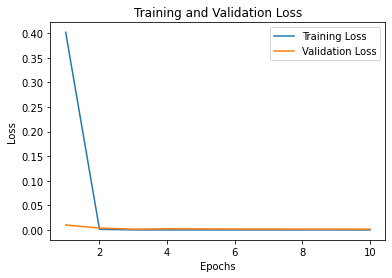

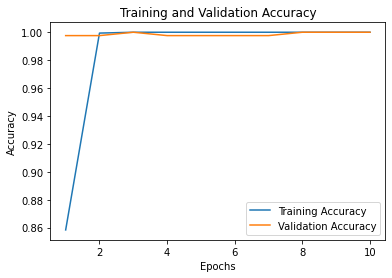

In [70]:
# Extract loss and accuracy data from the history object
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting loss and validation loss
epochs = np.arange(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting accuracy and validation accuracy
plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [14]:
model.save('dataset_jam.h5')

# model 2 with drop out layer and image augmentation

In [73]:
model2 = keras.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=4, activation='softmax')
])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

history2 = model2.fit(datagen.flow(X_train, y_train, batch_size=32),
                     epochs=10,
                     validation_data=(X_test, y_test))


Epoch 1/10
52/52 [==============================] - 22s 379ms/step - loss: 1.6721 - accuracy: 0.2644 - val_loss: 1.3861 - val_accuracy: 0.2578
Epoch 2/10
52/52 [==============================] - 19s 362ms/step - loss: 1.3856 - accuracy: 0.2839 - val_loss: 1.3708 - val_accuracy: 0.4940
Epoch 3/10
52/52 [==============================] - 19s 368ms/step - loss: 1.1318 - accuracy: 0.4930 - val_loss: 0.4468 - val_accuracy: 0.9157
Epoch 4/10
52/52 [==============================] - 19s 363ms/step - loss: 0.7731 - accuracy: 0.6778 - val_loss: 0.1358 - val_accuracy: 0.9855
Epoch 5/10
52/52 [==============================] - 19s 365ms/step - loss: 0.6312 - accuracy: 0.7416 - val_loss: 0.0864 - val_accuracy: 0.9928
Epoch 6/10
52/52 [==============================] - 19s 362ms/step - loss: 0.5246 - accuracy: 0.7775 - val_loss: 0.0585 - val_accuracy: 0.9928
Epoch 7/10
52/52 [==============================] - 19s 358ms/step - loss: 0.4893 - accuracy: 0.7994 - val_loss: 0.0371 - val_accuracy: 0.9952

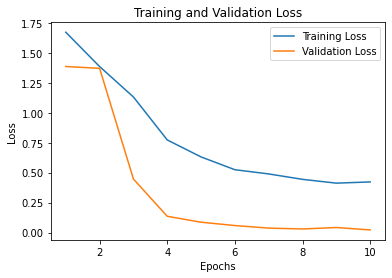

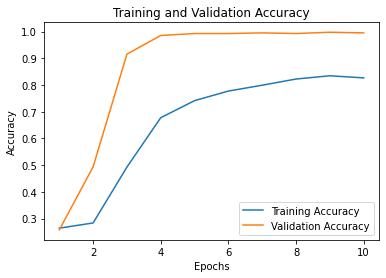

In [75]:
# Extract loss and accuracy data from the history object
import matplotlib.pyplot as plt
loss = history2.history['loss']
val_loss = history2.history['val_loss']
accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']

# Plotting loss and validation loss
epochs = np.arange(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting accuracy and validation accuracy
plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [76]:
model.save('augmented_dataset.h5')

# choose a random image and predict from dataset

In [13]:
import cv2
import mediapipe as mp
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import keras
model=keras.models.load_model('dataset_jam.h5')
labels=['fist', 'left', 'rotate','right']

dataset_path = 'C:\\Users\\jithi\\OneDrive\\Desktop\\VsCode'

subfolders = [f.path for f in os.scandir(dataset_path) if f.is_dir()]

random_subfolder = random.choice(subfolders)
print("Chosen Subfolder:", os.path.basename(random_subfolder))
image_files = [f.path for f in os.scandir(random_subfolder) if f.is_file() and f.name.lower().endswith('.jpg')]
random_image_file = random.choice(image_files)
image = cv2.imread(random_image_file)
resized_image =image
normalized_image = resized_image / 255.0
plt.imshow(normalized_image)
preprocessed_image = normalized_image.reshape(1, 256, 256, 3)

predictions = model.predict(preprocessed_image)
predicted_label = np.argmax(predictions)

# Print the predicted label
print("Predicted Label:", labels[predicted_label])


Chosen Subfolder: .vs


IndexError: list index out of range

In [99]:
predictions

array([[2.7938650e-06, 9.9999559e-01, 2.5840495e-07, 1.4500603e-06]],
      dtype=float32)

#  integration with opencv

In [1]:
import cv2
import mediapipe as mp
import numpy as np
from tensorflow import keras

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
model=keras.models.load_model('dataset_jam.h5')

In [ ]:
model.summary()

In [16]:
import cv2
import mediapipe as mp
import numpy as np
from tensorflow import keras

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
model=keras.models.load_model('dataset_jam.h5')
class_labels=['fist_open', 'left', 'rotate','right']
# Function to process a single frame
def process_frame(frame):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.4) as hands:
        results = hands.process(frame_rgb)
        if results.multi_hand_landmarks:
            white_image = np.ones_like(frame) * 255
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    white_image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                    landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 0), thickness=2, circle_radius=2),
                    connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 0), thickness=2)
                )

                landmarks = hand_landmarks.landmark
                x_min = min(landmarks, key=lambda landmark: landmark.x).x
                x_max = max(landmarks, key=lambda landmark: landmark.x).x
                y_min = min(landmarks, key=lambda landmark: landmark.y).y
                y_max = max(landmarks, key=lambda landmark: landmark.y).y
                x_min = int(x_min * frame.shape[1])
                x_max = int(x_max * frame.shape[1])
                y_min = int(y_min * frame.shape[0])
                y_max = int(y_max * frame.shape[0])
                padding = 20
                x_min, x_max, y_min, y_max = x_min - padding, x_max + padding, y_min - padding, y_max + padding
                x_min = max(0, x_min)
                x_max = min(frame.shape[1], x_max)
                y_min = max(0, y_min)
                y_max = min(frame.shape[0], y_max)

                cv2.rectangle(white_image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

                processed_image = white_image[y_min:y_max, x_min:x_max]
                processed_image = cv2.resize(processed_image, (256,256))
                processed_image = processed_image / 255.0  

                predictions = model.predict(np.expand_dims(processed_image, axis=0))
                predicted_class = class_labels[np.argmax(predictions)]
                confidence = np.max(predictions)

                label = f"{predicted_class}: {confidence:.2f}"
                cv2.putText(white_image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
                print(f"Predicted class: {predicted_class}")
                print(f"Confidence: {confidence}")

            cv2.imshow("Hand Landmarks", white_image)
        else:
            cv2.imshow("Hand Landmarks", np.ones_like(frame) * 255)

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    # frame=cv2.flip(frame,1)
    process_frame(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 132ms/step
Predicted class: rotate
Confidence: 1.0
1/1 [==============================] - 0s 39ms/step
Predicted class: rotate
Confidence: 1.0
1/1 [==============================] - 0s 28ms/step
Predicted class: rotate
Confidence: 1.0
1/1 [==============================] - 0s 29ms/step
Predicted class: rotate
Confidence: 1.0
1/1 [==============================] - 0s 30ms/step
Predicted class: rotate
Confidence: 1.0
1/1 [==============================] - 0s 32ms/step
Predicted class: rotate
Confidence: 1.0
1/1 [==============================] - 0s 28ms/step
Predicted class: rotate
Confidence: 1.0
1/1 [==============================] - 0s 29ms/step
Predicted class: rotate
Confidence: 1.0
1/1 [==============================] - 0s 28ms/step
Predicted class: rotate
Confidence: 1.0
1/1 [==============================] - 0s 30ms/step
Predicted class: rotate
Confidence: 1.0
1/1 [==============================] - 0s 28ms/step
Predicted class: rotate
Con

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

# with keyboard integration

In [15]:
import cv2
import mediapipe as mp
import numpy as np
from tensorflow import keras
import pyautogui

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
model = keras.models.load_model('dataset_jam.h5')
class_labels = ['fist_open', 'left', 'rotate', 'right']

def process_frame(frame):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.4) as hands:
        results = hands.process(frame_rgb)
        if results.multi_hand_landmarks:
            white_image = np.ones_like(frame) * 255
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    white_image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                    landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 0), thickness=2, circle_radius=2),
                    connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 0), thickness=2)
                )

                landmarks = hand_landmarks.landmark
                x_min = min(landmarks, key=lambda landmark: landmark.x).x
                x_max = max(landmarks, key=lambda landmark: landmark.x).x
                y_min = min(landmarks, key=lambda landmark: landmark.y).y
                y_max = max(landmarks, key=lambda landmark: landmark.y).y
                x_min = int(x_min * frame.shape[1])
                x_max = int(x_max * frame.shape[1])
                y_min = int(y_min * frame.shape[0])
                y_max = int(y_max * frame.shape[0])
                padding = 20
                x_min, x_max, y_min, y_max = x_min - padding, x_max + padding, y_min - padding, y_max + padding
                x_min = max(0, x_min)
                x_max = min(frame.shape[1], x_max)
                y_min = max(0, y_min)
                y_max = min(frame.shape[0], y_max)

                cv2.rectangle(white_image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

                processed_image = white_image[y_min:y_max, x_min:x_max]
                processed_image = cv2.resize(processed_image, (256, 256))
                processed_image = processed_image / 255.0 

                predictions = model.predict(np.expand_dims(processed_image, axis=0))
                predicted_class = class_labels[np.argmax(predictions)]
                confidence = np.max(predictions)

                label = f"{predicted_class}: {confidence:.2f}"
                cv2.putText(white_image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
                print(f"Predicted class: {predicted_class}")
                print(f"Confidence: {confidence}")
                if predicted_class == 'left':
                    pyautogui.press('left')
                elif predicted_class == 'right':
                    pyautogui.press('right')
                elif predicted_class == 'rotate':
                    pyautogui.press('up')

            cv2.imshow("Hand Landmarks", white_image)
        else:
            cv2.imshow("Hand Landmarks", np.ones_like(frame) * 255)

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    process_frame(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 125ms/step
Predicted class: fist_open
Confidence: 0.802920937538147
1/1 [==============================] - 0s 30ms/step
Predicted class: fist_open
Confidence: 0.9999854564666748
1/1 [==============================] - 0s 30ms/step
Predicted class: fist_open
Confidence: 0.9998966455459595
1/1 [==============================] - 0s 29ms/step
Predicted class: fist_open
Confidence: 0.99996018409729
1/1 [==============================] - 0s 27ms/step
Predicted class: rotate
Confidence: 1.0
1/1 [==============================] - 0s 28ms/step
Predicted class: rotate
Confidence: 1.0
1/1 [==============================] - 0s 28ms/step
Predicted class: rotate
Confidence: 1.0
1/1 [==============================] - 0s 27ms/step
Predicted class: rotate
Confidence: 1.0
1/1 [==============================] - 0s 28ms/step
Predicted class: rotate
Confidence: 0.999862790107727
1/1 [==============================] - 0s 27ms/step
Predicted class: rotate
Confidence: 

In [ ]:
import random
import math

def generate_prime_number(bits):
    while True:
        num = random.getrandbits(bits)
        if num % 2 != 0 and is_prime(num):
            return num

def is_prime(num):
    if num == 2 or num == 3:
        return True
    if num < 2 or num % 2 == 0:
        return False
    for i in range(3, int(math.sqrt(num)) + 1, 2):
        if num % i == 0:
            return False
    return True

def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

def extended_gcd(a, b):
    if a == 0:
        return b, 0, 1
    gcd, x1, y1 = extended_gcd(b % a, a)
    x = y1 - (b // a) * x1
    y = x1
    return gcd, x, y

def generate_keypair():
    p = generate_prime_number(256)
    q = generate_prime_number(256)
    n = p * q
    phi = (p - 1) * (q - 1)
    
    while True:
        e = random.randrange(2, phi)
        if gcd(e, phi) == 1:
            break
    
    gcd_val, d, _ = extended_gcd(e, phi)
    d = d % phi
    if d < 0:
        d += phi
    
    return (e, n), (d, n)

def encrypt(plaintext, public_key):
    e, n = public_key
    encrypted = [pow(ord(char), e, n) for char in plaintext]
    return encrypted

def decrypt(ciphertext, private_key):
    d, n = private_key
    decrypted = [chr(pow(char, d, n)) for char in ciphertext]
    return ''.join(decrypted)

# Example usage:
plaintext = "Hello, World!"
public_key, private_key = generate_keypair()
ciphertext = encrypt(plaintext, public_key)
decrypted_text = decrypt(ciphertext, private_key)

print("Plaintext:", plaintext)
print("Ciphertext:", ciphertext)
print("Decrypted Text:", decrypted_text)
